In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten , Input

In [2]:
# Dataset
from tensorflow.keras.datasets import mnist
(x_train,y_train) , (x_test,y_test) = mnist.load_data()

#Normalizing the data
x_train , x_test = x_train / 255 , x_test / 255

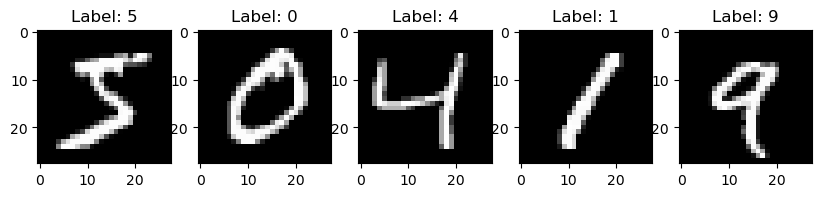

In [3]:
#Displaying some of the images
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
plt.show()



In [4]:
#Neural Network model
model_cnn = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    Conv2D(15, (3, 3), activation='relu'),
    Flatten(),
    Dense(units=10, activation='softmax')
])

# Display the model's architecture
model_cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 15)          │           4,335 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8640)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          86,410 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91,065 (355.72 KB)

 Trainable params: 91,065 (355.72 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Compiling the model
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model_cnn.compile(optimizer="adam", loss=SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [35]:
#Fitting the model
model_cnn.fit(x_train, y_train, epochs = 10,validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9978 - loss: 0.0049 - val_accuracy: 0.9982 - val_loss: 0.0051
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9988 - loss: 0.0042 - val_accuracy: 0.9975 - val_loss: 0.0075
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9990 - loss: 0.0025 - val_accuracy: 0.9975 - val_loss: 0.0078
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9993 - loss: 0.0022 - val_accuracy: 0.9970 - val_loss: 0.0103
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9991 - loss: 0.0040 - val_accuracy: 0.9982 - val_loss: 0.0072
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9988 - loss: 0.0038 - val_accuracy: 0.9960 - val_loss: 0.0137
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9994 - loss: 0.0016 - val_accuracy: 0.9948 - val_loss: 0.0194
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9993 - loss: 0.0024 - 

In [37]:
#Predictions
predictions = model_cnn.predict(x_test) #it gives the probabilty of each class
results = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [39]:
# Evaluate the model on the test dataset
loss, accuracy = model_cnn.evaluate(x_test, y_test)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9828 - loss: 0.1142
Test Loss: 0.09586166590452194
Test Accuracy: 0.98580002784729


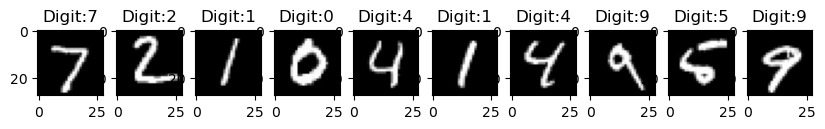

In [41]:
#Visualisation of some results
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(2,10,i+1)
    plt.imshow(x_test[i], cmap = "gray")
    plt.title(f"Digit:{results[i]}")
plt.show()